# Data Visiualization
This notebook gives visualizations for dataset. Inputs are pandas frame which should have following fields [image_path, label, xmin, ymin, xmax, ymax, xc, yc, w, h]. image_path is the unique path name of the image. label is class label of the bounding box. All the coordinates are nomalized between 0 and 1


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 20}
rc('font', **font)

## Loading Dataframes
We read pandas frame from CSV files. The two files are used. One which stores bounding boxes from test data and one which stores data from train folder. The CSV files for a dataset can be generated using script script_csv_gen_bndbox.py

python script_csv_gen_bndbox.py <dataset_path> <output_file>

eg. python script_csv_gen_bndbox.py data/leaf_data_v2/test test_leaf_data_v2.csv

In [17]:
# train_csv_path = 'annotation_data/train_leaf_data_v3.csv'
# test_csv_path = 'annotation_data/test_leaf_data_v3.csv'
train_csv_path = 'annotation_data/train_leaf_data_v2.csv'
test_csv_path = 'annotation_data/test_leaf_data_v2.csv'

In [18]:
train_df = pd.read_csv(train_csv_path)
train_df.head()

,image_path,label,xmin,ymin,xmax,ymax,xc,yc,w,h
0,.\data\leaf_data_v2\train\leaf_infected_0.jpg,infected,0.579291,0.002809,0.850047,0.466643,0.714669,0.234726,0.270756,0.463834
1,.\data\leaf_data_v2\train\leaf_infected_0.jpg,infected,0.208256,0.718048,0.333022,1.000000,0.270639,0.859024,0.124767,0.281952
2,.\data\leaf_data_v2\train\leaf_infected_0.jpg,infected,0.163013,0.046348,0.268424,0.314607,0.215718,0.180478,0.105410,0.268258
3,.\data\leaf_data_v2\train\leaf_infected_0.jpg,infected,0.127799,0.583919,0.230877,0.795646,0.179338,0.689782,0.103078,0.211728
4,.\data\leaf_data_v2\train\leaf_infected_0.jpg,infected,0.334188,0.548806,0.460588,0.660463,0.397388,0.604635,0.126399,0.111657


In [19]:
test_df = pd.read_csv(test_csv_path)
test_df.head()

,image_path,label,xmin,ymin,xmax,ymax,xc,yc,w,h
0,.\data\leaf_data_v2\train\leaf_infected_1.jpg,infected,0.765159,0.454003,1.000000,0.739817,0.882579,0.596910,0.234841,0.285815
1,.\data\leaf_data_v2\train\leaf_infected_1.jpg,infected,0.717118,0.809340,0.793843,1.000000,0.755480,0.904670,0.076726,0.190660
2,.\data\leaf_data_v2\train\leaf_infected_1.jpg,infected,0.098647,0.524228,0.188433,0.768961,0.143540,0.646594,0.089785,0.244733
3,.\data\leaf_data_v2\train\leaf_infected_1.jpg,infected,0.001866,0.146419,0.154618,0.496489,0.078242,0.321454,0.152752,0.350070
4,.\data\leaf_data_v2\train\leaf_infected_1.jpg,infected,0.001866,0.124298,0.363106,0.448736,0.182486,0.286517,0.361241,0.324438


## Describing bounding box coordinates
Here we describe the train dataframe and test dataframe. We make sure that counts for all columns are same. And min value of the coordinates are >=0 and max values of coordinates are <= 1.0. If this condition is not satisfied then we know that there is some mistake while labelling images

In [20]:
#Describe train dataset
train_df.describe()

,xmin,ymin,xmax,ymax,xc,yc,w,h
count,3128.000000,3128.000000,3128.000000,3128.000000,3128.000000,3128.000000,3128.000000,3128.000000
mean,0.428541,0.378740,0.574869,0.579933,0.501705,0.479337,0.146328,0.201193
std,0.236141,0.255946,0.243847,0.264917,0.234215,0.252514,0.104979,0.127768
min,0.000233,0.000351,0.050000,0.043519,0.025521,0.027315,0.017188,0.025000
25%,0.250000,0.158102,0.394335,0.359259,0.329139,0.263889,0.078358,0.112963
50%,0.423966,0.363413,0.568773,0.569659,0.493130,0.469680,0.115625,0.164815
75%,0.593867,0.584259,0.765234,0.803704,0.669365,0.687237,0.178646,0.252107
max,0.969271,0.969444,1.000000,1.000000,0.984375,0.984722,0.913542,0.996296


In [21]:
#Describe test dataset
test_df.describe()

,xmin,ymin,xmax,ymax,xc,yc,w,h
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,0.437323,0.414101,0.570612,0.608536,0.503968,0.511318,0.133289,0.194436
std,0.230304,0.265928,0.236398,0.270763,0.227398,0.259454,0.104927,0.137097
min,0.000521,0.000351,0.046875,0.050926,0.023958,0.027315,0.020833,0.037963
25%,0.262500,0.178262,0.402083,0.406481,0.339715,0.306446,0.070703,0.098148
50%,0.422656,0.406426,0.543750,0.625000,0.480183,0.514583,0.097831,0.158984
75%,0.577995,0.649769,0.769485,0.845703,0.676662,0.726852,0.150297,0.247222
max,0.922917,0.956481,1.000000,1.000000,0.961458,0.978241,0.556250,0.804630


Get unique labels from test and train dataframe to make sure they are same.

In [22]:
train_labels = np.sort(train_df['label'].unique())
test_labels = np.sort(test_df['label'].unique())
print('Labels in train dataset', train_labels)
print('Labels in test dataset', test_labels)

Labels in train dataset ['infected' 'not_infected']
Labels in test dataset ['infected' 'not_infected']


## Show dataset visualizations
### Train and test split
Calculate number of samples in train and test data. Find the test:train split ratio and plot the graph.

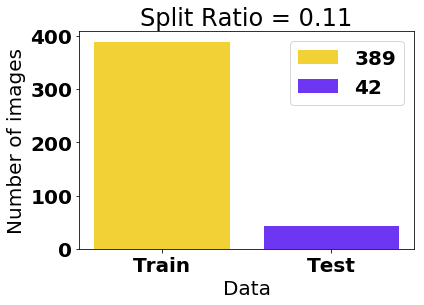

In [23]:
n_train_samples = train_df['image_path'].unique().shape[0]
n_test_samples = test_df['image_path'].unique().shape[0]
split_ratio = np.round(n_test_samples / n_train_samples,decimals=2)
plt.title('Split Ratio = {}'.format(split_ratio))
plt.xlabel('Data')
plt.ylabel('Number of images')
bars = plt.bar([0,1],[n_train_samples,n_test_samples],width=0.8
        ,color=[(0.949, 0.819, 0.211),(0.427, 0.211, 0.949)],tick_label=['Train','Test'])
plt.legend(bars,[n_train_samples,n_test_samples],loc=0)

### Bounding box visualization 
Count the number of the bounding boxes in the train and test dataset. class_labels is list which stores unique class labels across whole dataset. This is used while plotting graph for overall dataset.

In [24]:
class_labels = []

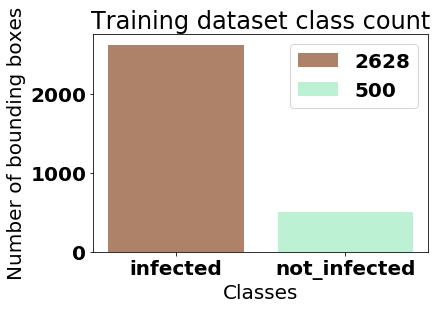

In [26]:
#Plot graph for training dataset
idx = []
label_count = []
for i in train_labels:
    i_count = train_df.groupby(by='label')['label'].count()[i]
    label_count.append(i_count)
    idx.append(i)
    if i not in class_labels:
        class_labels.append(i)
    
plt.title('Training dataset class count')
plt.xlabel('Classes')
plt.ylabel('Number of bounding boxes')
plt.xticks( rotation='horizontal')
bars = plt.bar(idx,label_count,width=0.8
        ,tick_label=train_labels,color=np.random.uniform(size=(len(train_labels),3)))
plt.legend(bars,label_count,loc=0)

train_counts = label_count

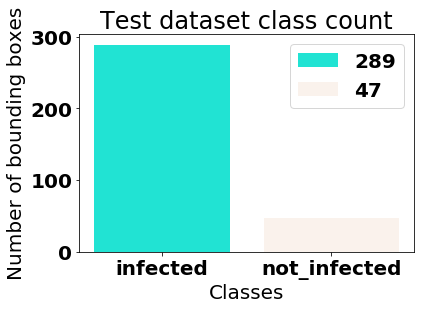

In [27]:
#Plot graph for test dataset
idx = []
label_count = []
for i in test_labels:
    i_count = test_df.groupby(by='label')['label'].count()[i]
    label_count.append(i_count)
    idx.append(i)
    
    if i not in class_labels:
        class_labels.append(i)

plt.title('Test dataset class count')
plt.xlabel('Classes')
plt.ylabel('Number of bounding boxes')
plt.xticks( rotation='horizontal')
bars = plt.bar(idx,label_count,width=0.8,tick_label=test_labels,color=np.random.uniform(size=(len(test_labels),3)))
plt.legend(bars,label_count,loc=0)

test_counts = label_count

In [28]:
#Join train and test dataframe 
train_test_df = pd.concat((train_df,test_df))
train_test_labels = train_test_df['label'].unique()

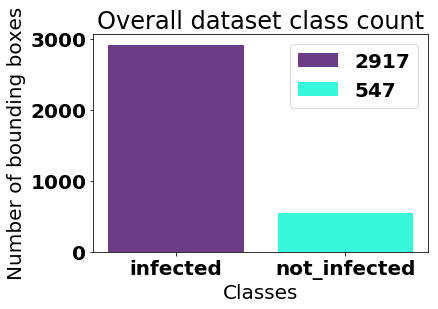

In [29]:
#Plot graph for whole dataset
idx = []
label_count = []
for i in class_labels:
    i_count = train_test_df.groupby(by='label')['label'].count()[i]
    label_count.append(i_count)
    idx.append(i)
plt.title('Overall dataset class count')
plt.xlabel('Classes')
plt.ylabel('Number of bounding boxes')
plt.xticks( rotation='horizontal')
bars = plt.bar(idx,label_count,width=0.8
        ,tick_label=train_test_labels,color=np.random.uniform(size=(len(train_labels),3)))
plt.legend(bars,label_count,loc=0)

In [30]:
#Plot heatmap to show bounding box counts in train and test
data = np.array([train_counts,test_counts])
labels = class_labels
data

array([[2628,  500],
       [ 289,   47]], dtype=int64)

Text(0.5, 1.0, 'Dataset overview')

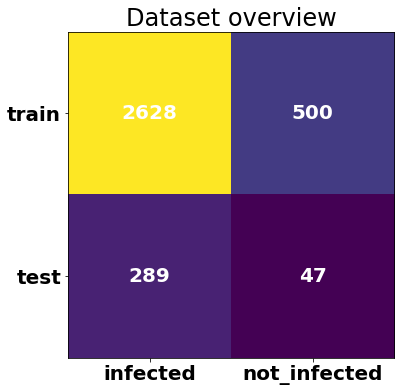

In [31]:
fig, ax = plt.subplots(figsize=(6,6))

im = ax.imshow(data)
# We want to show all ticks...
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(2))

# ... and label them with the respective list entries
ax.set_xticklabels(labels)
ax.set_yticklabels(['train','test'])

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=0, ha="center",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(2):
    for j in range(len(labels)):
        text = ax.text(j, i, data[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Dataset overview")